In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report



# 0. Iris flower dataset

# A-F

In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# insert two new columns named 'species' and species_name
df['species'] = iris.target
df['species_name'] = [iris.target_names[i] for i in iris.target]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


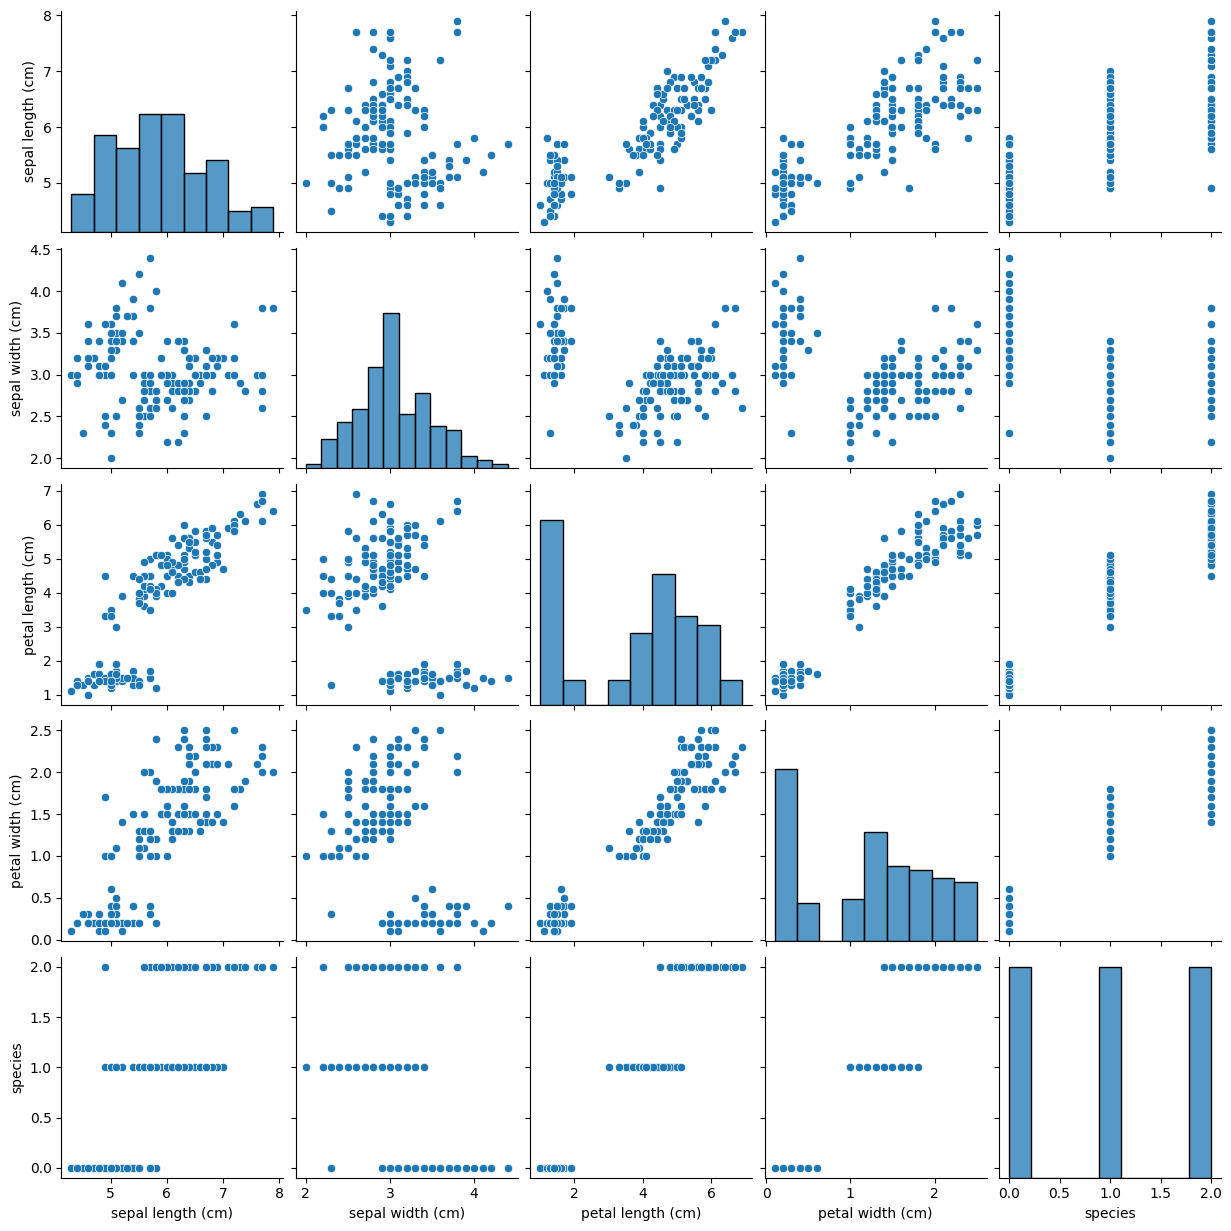

In [15]:
# Do some EDA to get an understanding of the dataset
sns.pairplot(df);

# change column names
#df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


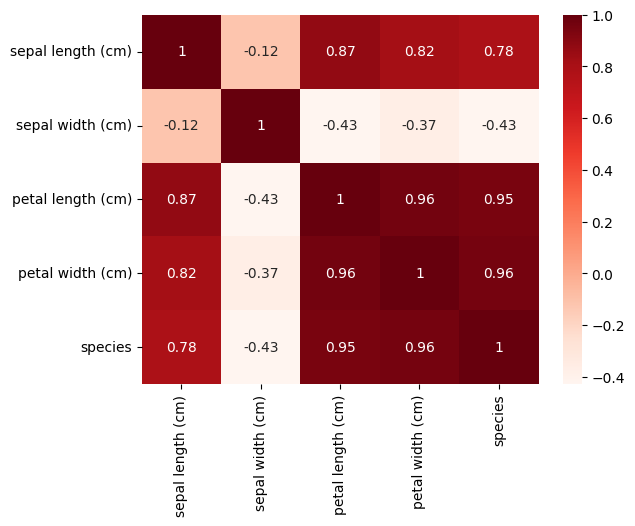

In [16]:
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds);

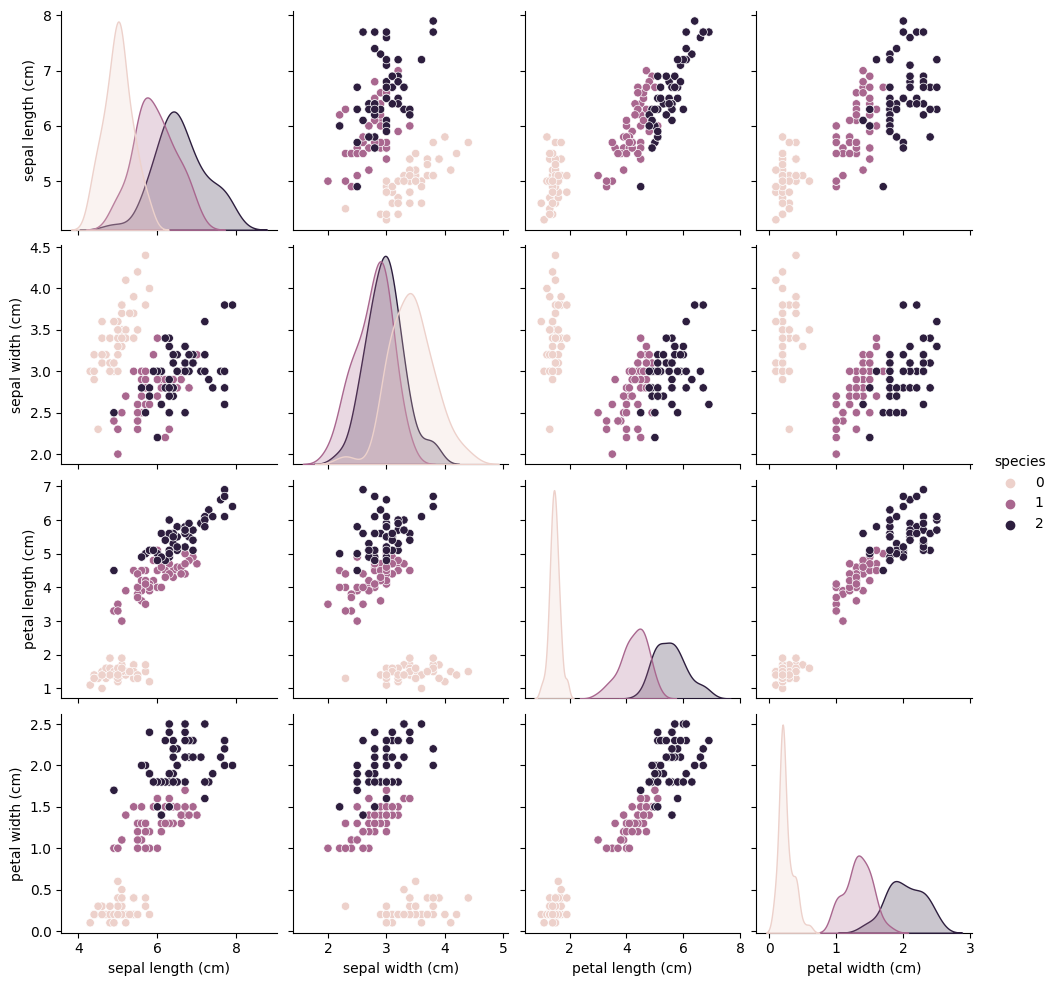

In [17]:
# create multiple plots of each species
sns.pairplot(df, hue='species');


In [18]:
# create a boxplot of each species
def boxplot_by_species(df):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle("Box plots for different features")
    sns.boxplot(x='species_name', y='sepal length (cm)', data=df, ax=axs[0, 0])
    sns.boxplot(x='species_name', y='sepal width (cm)', data=df, ax=axs[0, 1])
    sns.boxplot(x='species_name', y='petal length (cm)', data=df, ax=axs[1, 0])
    sns.boxplot(x='species_name', y='petal width (cm)', data=df, ax=axs[1, 1])


In [19]:
df['species_name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

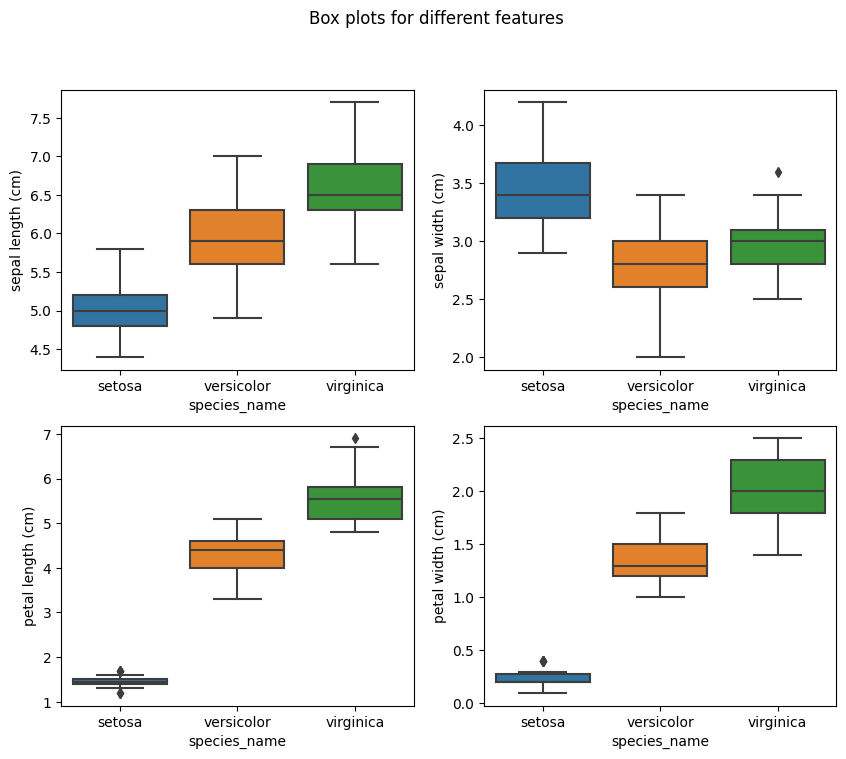

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # disables the warning message

# Separate the data into three dataframes, one for each species
# Remove outliers one species at a time using the IQR method
# Once you're done you can concatenate the three dataframes into one, and it works
# There probably a better way to do this (for-loop), but this is what I came up with

df_s = df[df['species_name'] == 'setosa']
df_v = df[df['species_name'] == 'versicolor']
df_vir = df[df['species_name'] == 'virginica']


#------------------------------SETOSA---------------------------------------
Q1_s = df[df['species_name'] == "setosa"].quantile(0.25)
Q3_s = df[df['species_name'] == 'setosa'].quantile(0.75)

IQR = Q3_s - Q1_s

df_setosa = df_s[~((df_s < (Q1_s - 1.5 * IQR)) | (df_s > (Q3_s + 1.5 * IQR))).any(axis=1)]

#------------------------------VERSICOLOR---------------------------------------
Q1_v = df[df['species_name'] == "versicolor"].quantile(0.25)
Q3_v = df[df['species_name'] == 'versicolor'].quantile(0.75)

IQR = Q3_v - Q1_v

df_versicolor = df_v[~((df_v < (Q1_v - 1.5 * IQR)) | (df_v > (Q3_v + 1.5 * IQR))).any(axis=1)]

#------------------------------VIRGINICA---------------------------------------
Q1_vir = df[df['species_name'] == "virginica"].quantile(0.25)
Q3_vir = df[df['species_name'] == 'virginica'].quantile(0.75)

IQR = Q3_vir - Q1_vir

df_virginica = df_vir[~((df_vir < (Q1_vir - 1.5 * IQR)) | (df_vir > (Q3_vir + 1.5 * IQR))).any(axis=1)]

# Create a new dataframe that concatenates the three species
df = pd.concat([df_setosa, df_versicolor, df_virginica])

boxplot_by_species(df)

# You can also you scipy to remove outliers:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# from scipy import stats
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [21]:
# species_name = ["versicolor, setosa, virginica"]
# df_list = []

# for species in species_name:
#     Q1 = df[df['species_name'] == species].quantile(0.25)
#     Q3 = df[df['species_name'] == species].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#     df_list.append(df)

# df_for_loop = pd.concat(df_list)
# df_for_loop

# Still not sure why this doesn't work
# create a for-loop to remove outliers from each species


# 1. Train|test split and data scaling

In [22]:
# split and scale data

X = df.drop(['species', 'species_name'], axis=1)
y = df['species_name']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# check the mean and standard deviation on training and test data
print(f"Mean on training data: {X_train.mean():.18f}")
print(f"Mean on test data: {X_test.mean():.3f}")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Mean on training data: 0.000000000000000673
Mean on test data: 0.070


((91, 4), (46, 4), (91,), (46,))

# 2. Classify with logistic regression

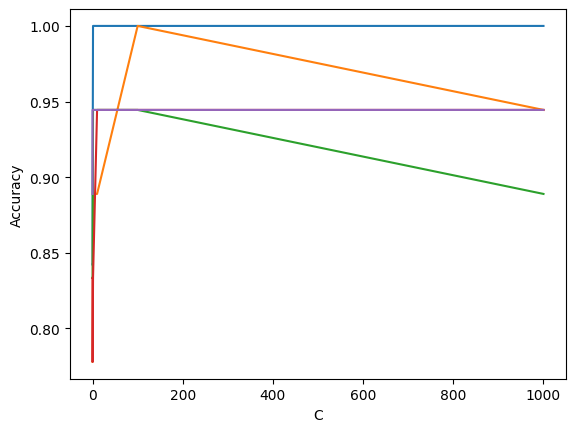

In [23]:
# use k-folded cross-validation with logistic regression to find suitable hyperparameters and model.
# I'm using the default solver, but you can change it to 'lbfgs' or 'sag' if you want to
# I'm also using the default penalty, but you can change it to 'l1' or 'l2' if you want to

# create a list of values for C
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# create a list to store the scores
scores = []

# use a for-loop to find the best C value
for c in C:
    logreg = LogisticRegression(C=c, solver='liblinear')
    scores.append(cross_val_score(logreg, X_train, y_train, cv=5))

# plot the scores
plt.plot(C, scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



In [24]:
# use k-folded cross-validation with logistic regression to find suitable hyperparameters and model.
from sklearn.model_selection import KFold

model = LogisticRegression()
model.fit(X_train, y_train)

kfold = KFold(n_splits=5, shuffle=True)
model = LogisticRegression(C=10, penalty='l2')
results = cross_val_score(model, X_train, y_train, cv=12, scoring='accuracy')

print(results)
# print the accuracy of the model
print(f"Accuracy: {results.mean():.3f} ({results.std():.3f})")


[1.         1.         1.         1.         1.         0.875
 1.         1.         1.         0.85714286 1.         1.        ]
Accuracy: 0.978 (0.050)


In [28]:
y_test.head(10)

115     virginica
114     virginica
12         setosa
31         setosa
136     virginica
74     versicolor
72     versicolor
127     virginica
146     virginica
93     versicolor
Name: species_name, dtype: object

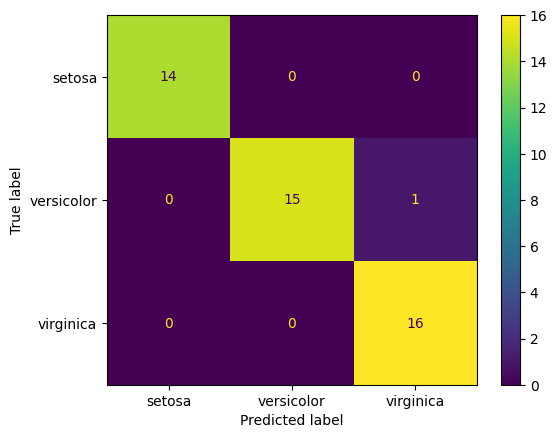

In [25]:
# create confusion matrix based on previous data
model = LogisticRegression(C=5, penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf, display_labels = model.classes_)
disp.plot()


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

